# Task 1: Classification

- Create a Neural Network model
- Define optimization procedure
- Train Classifier
- Evaluate model on test set

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from utils import NoisyFashionMNIST
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from torch import device
from torch.optim.lr_scheduler import StepLR

%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

## Dataset

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform=transforms.Compose([
        transforms.ToTensor()])

train_dataset = datasets.FashionMNIST("./data", train = True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST("./data", train = False, download=True, transform=transform)


idx_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}

In [3]:
x,y = train_dataset[1]
idx_to_class[y]

'T-shirt/top'

['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal']


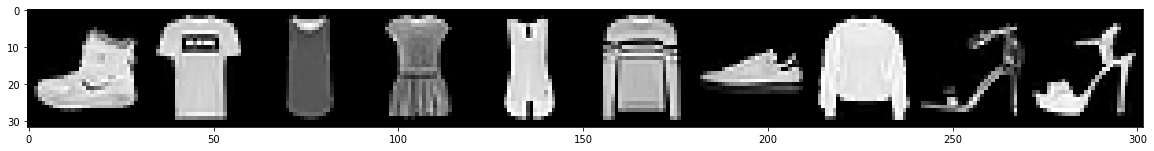

In [4]:
x = [train_dataset[i][0] for i in range(10)]
labels = [idx_to_class[train_dataset[i][1]] for i in range(10)]
print(labels)

plt.figure(figsize=(20,10))
show(torchvision.utils.make_grid(x, nrow=10))
plt.show()

In [5]:
# class Model(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(3,6,5)
#         self.conv2 = nn.Conv2d(6,16,5)
#         self.fc1 = nn.Linear(16*5*5,120)
#         self.fc2 = nn.Linear(120,84)
#         self.fc3 = nn.Linear(84,)
        
#     def forward(self,x):
#         out = F.relu(self.conv1(x))
#         out = F.max_pool2d(out,2)
#         out = F.relu(self.conv2(out))
#         out = F.max_pool2d(out,2)
#         out = out.view(out.size(0),-1)
#         out = F.relu(self.fc1(out))
#         out = F.relu(self.fc2(out))
        
#         return out

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, 1)
        self.batchN1 = nn.BatchNorm2d(num_features=6)
        self.conv2 = nn.Conv2d(6, 12, 5, 1)
        self.batchN2 = nn.BatchNorm2d(num_features=12)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(1200, 60)
        self.fc2 = nn.Linear(60, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


# In[ ]:


def train(model,device,train_loader,optimizer,epoch):
    model.train()
    for batch_idx,(data,target) in enumerate(train_loader):
        data,target = data.to(device),target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output,target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,batch_idx * len(data), len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),loss.item()),end='\r')
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() #␣
            #!sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the␣
            #֒!max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            test_loss /= len(test_loader.dataset)
            print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.
                  format(test_loss, correct, len(test_loader.dataset),
                     100. * correct / len(test_loader.dataset)), end='\r')

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64)
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
for epoch in range(1,25 + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()
        

Train Epoch: 1 [59520/60000 (99%)]	Loss: 0.618246
Test set: Average loss: 0.0040, Accuracy: 45/10000 (0%)

Test set: Average loss: 0.0022, Accuracy: 101/10000 (1%)

Test set: Average loss: 0.0026, Accuracy: 158/10000 (2%)

Test set: Average loss: 0.0026, Accuracy: 212/10000 (2%)

Test set: Average loss: 0.0027, Accuracy: 265/10000 (3%)

Test set: Average loss: 0.0027, Accuracy: 317/10000 (3%)

Test set: Average loss: 0.0031, Accuracy: 372/10000 (4%)

Test set: Average loss: 0.0031, Accuracy: 424/10000 (4%)

Test set: Average loss: 0.0029, Accuracy: 478/10000 (5%)

Test set: Average loss: 0.0036, Accuracy: 529/10000 (5%)

Test set: Average loss: 0.0036, Accuracy: 581/10000 (6%)

Test set: Average loss: 0.0040, Accuracy: 631/10000 (6%)

Test set: Average loss: 0.0026, Accuracy: 690/10000 (7%)

Test set: Average loss: 0.0024, Accuracy: 748/10000 (7%)

Test set: Average loss: 0.0022, Accuracy: 803/10000 (8%)

Test set: Average loss: 0.0043, Accuracy: 852/10000 (9%)

Test set: Average loss:


Test set: Average loss: 0.0032, Accuracy: 7678/10000 (77%)

Test set: Average loss: 0.0020, Accuracy: 7735/10000 (77%)

Test set: Average loss: 0.0039, Accuracy: 7785/10000 (78%)

Test set: Average loss: 0.0031, Accuracy: 7839/10000 (78%)

Test set: Average loss: 0.0026, Accuracy: 7896/10000 (79%)

Test set: Average loss: 0.0027, Accuracy: 7951/10000 (80%)

Test set: Average loss: 0.0023, Accuracy: 8008/10000 (80%)

Test set: Average loss: 0.0017, Accuracy: 8067/10000 (81%)

Test set: Average loss: 0.0029, Accuracy: 8120/10000 (81%)

Test set: Average loss: 0.0036, Accuracy: 8168/10000 (82%)

Test set: Average loss: 0.0004, Accuracy: 8183/10000 (82%)
Train Epoch: 2 [59520/60000 (99%)]	Loss: 0.613638
Test set: Average loss: 0.0034, Accuracy: 48/10000 (0%)

Test set: Average loss: 0.0018, Accuracy: 107/10000 (1%)

Test set: Average loss: 0.0021, Accuracy: 163/10000 (2%)

Test set: Average loss: 0.0022, Accuracy: 219/10000 (2%)

Test set: Average loss: 0.0022, Accuracy: 273/10000 (3%)

T


Test set: Average loss: 0.0033, Accuracy: 7056/10000 (71%)

Test set: Average loss: 0.0024, Accuracy: 7113/10000 (71%)

Test set: Average loss: 0.0016, Accuracy: 7174/10000 (72%)

Test set: Average loss: 0.0021, Accuracy: 7228/10000 (72%)

Test set: Average loss: 0.0026, Accuracy: 7281/10000 (73%)

Test set: Average loss: 0.0026, Accuracy: 7335/10000 (73%)

Test set: Average loss: 0.0023, Accuracy: 7391/10000 (74%)

Test set: Average loss: 0.0046, Accuracy: 7434/10000 (74%)

Test set: Average loss: 0.0023, Accuracy: 7489/10000 (75%)

Test set: Average loss: 0.0022, Accuracy: 7545/10000 (75%)

Test set: Average loss: 0.0032, Accuracy: 7597/10000 (76%)

Test set: Average loss: 0.0019, Accuracy: 7656/10000 (77%)

Test set: Average loss: 0.0028, Accuracy: 7710/10000 (77%)

Test set: Average loss: 0.0029, Accuracy: 7762/10000 (78%)

Test set: Average loss: 0.0032, Accuracy: 7812/10000 (78%)

Test set: Average loss: 0.0033, Accuracy: 7865/10000 (79%)

Test set: Average loss: 0.0028, Accurac


Test set: Average loss: 0.0019, Accuracy: 6145/10000 (61%)

Test set: Average loss: 0.0026, Accuracy: 6200/10000 (62%)

Test set: Average loss: 0.0019, Accuracy: 6257/10000 (63%)

Test set: Average loss: 0.0029, Accuracy: 6311/10000 (63%)

Test set: Average loss: 0.0017, Accuracy: 6372/10000 (64%)

Test set: Average loss: 0.0018, Accuracy: 6430/10000 (64%)

Test set: Average loss: 0.0018, Accuracy: 6488/10000 (65%)

Test set: Average loss: 0.0021, Accuracy: 6543/10000 (65%)

Test set: Average loss: 0.0022, Accuracy: 6600/10000 (66%)

Test set: Average loss: 0.0017, Accuracy: 6658/10000 (67%)

Test set: Average loss: 0.0020, Accuracy: 6717/10000 (67%)

Test set: Average loss: 0.0025, Accuracy: 6770/10000 (68%)

Test set: Average loss: 0.0030, Accuracy: 6824/10000 (68%)

Test set: Average loss: 0.0027, Accuracy: 6876/10000 (69%)

Test set: Average loss: 0.0025, Accuracy: 6930/10000 (69%)

Test set: Average loss: 0.0019, Accuracy: 6989/10000 (70%)

Test set: Average loss: 0.0027, Accurac


Test set: Average loss: 0.0022, Accuracy: 5347/10000 (53%)

Test set: Average loss: 0.0023, Accuracy: 5400/10000 (54%)

Test set: Average loss: 0.0018, Accuracy: 5456/10000 (55%)

Test set: Average loss: 0.0026, Accuracy: 5512/10000 (55%)

Test set: Average loss: 0.0018, Accuracy: 5570/10000 (56%)

Test set: Average loss: 0.0024, Accuracy: 5625/10000 (56%)

Test set: Average loss: 0.0025, Accuracy: 5678/10000 (57%)

Test set: Average loss: 0.0025, Accuracy: 5733/10000 (57%)

Test set: Average loss: 0.0025, Accuracy: 5788/10000 (58%)

Test set: Average loss: 0.0028, Accuracy: 5839/10000 (58%)

Test set: Average loss: 0.0015, Accuracy: 5899/10000 (59%)

Test set: Average loss: 0.0020, Accuracy: 5958/10000 (60%)

Test set: Average loss: 0.0021, Accuracy: 6014/10000 (60%)

Test set: Average loss: 0.0019, Accuracy: 6071/10000 (61%)

Test set: Average loss: 0.0022, Accuracy: 6124/10000 (61%)

Test set: Average loss: 0.0022, Accuracy: 6179/10000 (62%)

Test set: Average loss: 0.0017, Accurac


Test set: Average loss: 0.0020, Accuracy: 5233/10000 (52%)

Test set: Average loss: 0.0031, Accuracy: 5285/10000 (53%)

Test set: Average loss: 0.0020, Accuracy: 5342/10000 (53%)

Test set: Average loss: 0.0023, Accuracy: 5397/10000 (54%)

Test set: Average loss: 0.0021, Accuracy: 5450/10000 (54%)

Test set: Average loss: 0.0019, Accuracy: 5507/10000 (55%)

Test set: Average loss: 0.0023, Accuracy: 5565/10000 (56%)

Test set: Average loss: 0.0016, Accuracy: 5624/10000 (56%)

Test set: Average loss: 0.0022, Accuracy: 5681/10000 (57%)

Test set: Average loss: 0.0023, Accuracy: 5735/10000 (57%)

Test set: Average loss: 0.0026, Accuracy: 5791/10000 (58%)

Test set: Average loss: 0.0027, Accuracy: 5846/10000 (58%)

Test set: Average loss: 0.0024, Accuracy: 5900/10000 (59%)

Test set: Average loss: 0.0012, Accuracy: 5958/10000 (60%)

Test set: Average loss: 0.0019, Accuracy: 6014/10000 (60%)

Test set: Average loss: 0.0021, Accuracy: 6071/10000 (61%)

Test set: Average loss: 0.0018, Accurac


Test set: Average loss: 0.0018, Accuracy: 4248/10000 (42%)

Test set: Average loss: 0.0032, Accuracy: 4300/10000 (43%)

Test set: Average loss: 0.0020, Accuracy: 4355/10000 (44%)

Test set: Average loss: 0.0014, Accuracy: 4415/10000 (44%)

Test set: Average loss: 0.0035, Accuracy: 4465/10000 (45%)

Test set: Average loss: 0.0027, Accuracy: 4521/10000 (45%)

Test set: Average loss: 0.0024, Accuracy: 4576/10000 (46%)

Test set: Average loss: 0.0019, Accuracy: 4633/10000 (46%)

Test set: Average loss: 0.0020, Accuracy: 4691/10000 (47%)

Test set: Average loss: 0.0029, Accuracy: 4749/10000 (47%)

Test set: Average loss: 0.0016, Accuracy: 4808/10000 (48%)

Test set: Average loss: 0.0033, Accuracy: 4860/10000 (49%)

Test set: Average loss: 0.0034, Accuracy: 4913/10000 (49%)

Test set: Average loss: 0.0038, Accuracy: 4963/10000 (50%)

Test set: Average loss: 0.0019, Accuracy: 5019/10000 (50%)

Test set: Average loss: 0.0021, Accuracy: 5073/10000 (51%)

Test set: Average loss: 0.0024, Accurac


Test set: Average loss: 0.0023, Accuracy: 3274/10000 (33%)

Test set: Average loss: 0.0018, Accuracy: 3331/10000 (33%)

Test set: Average loss: 0.0023, Accuracy: 3387/10000 (34%)

Test set: Average loss: 0.0025, Accuracy: 3444/10000 (34%)

Test set: Average loss: 0.0020, Accuracy: 3496/10000 (35%)

Test set: Average loss: 0.0016, Accuracy: 3555/10000 (36%)

Test set: Average loss: 0.0033, Accuracy: 3609/10000 (36%)

Test set: Average loss: 0.0032, Accuracy: 3662/10000 (37%)

Test set: Average loss: 0.0014, Accuracy: 3719/10000 (37%)

Test set: Average loss: 0.0025, Accuracy: 3774/10000 (38%)

Test set: Average loss: 0.0011, Accuracy: 3836/10000 (38%)

Test set: Average loss: 0.0012, Accuracy: 3896/10000 (39%)

Test set: Average loss: 0.0010, Accuracy: 3956/10000 (40%)

Test set: Average loss: 0.0016, Accuracy: 4014/10000 (40%)

Test set: Average loss: 0.0014, Accuracy: 4073/10000 (41%)

Test set: Average loss: 0.0020, Accuracy: 4131/10000 (41%)

Test set: Average loss: 0.0022, Accurac


Test set: Average loss: 0.0023, Accuracy: 2384/10000 (24%)

Test set: Average loss: 0.0021, Accuracy: 2440/10000 (24%)

Test set: Average loss: 0.0013, Accuracy: 2499/10000 (25%)

Test set: Average loss: 0.0025, Accuracy: 2556/10000 (26%)

Test set: Average loss: 0.0037, Accuracy: 2608/10000 (26%)

Test set: Average loss: 0.0026, Accuracy: 2663/10000 (27%)

Test set: Average loss: 0.0021, Accuracy: 2720/10000 (27%)

Test set: Average loss: 0.0029, Accuracy: 2777/10000 (28%)

Test set: Average loss: 0.0018, Accuracy: 2834/10000 (28%)

Test set: Average loss: 0.0036, Accuracy: 2888/10000 (29%)

Test set: Average loss: 0.0026, Accuracy: 2939/10000 (29%)

Test set: Average loss: 0.0019, Accuracy: 2996/10000 (30%)

Test set: Average loss: 0.0017, Accuracy: 3053/10000 (31%)

Test set: Average loss: 0.0037, Accuracy: 3108/10000 (31%)

Test set: Average loss: 0.0030, Accuracy: 3163/10000 (32%)

Test set: Average loss: 0.0016, Accuracy: 3222/10000 (32%)

Test set: Average loss: 0.0022, Accurac


Test set: Average loss: 0.0017, Accuracy: 1359/10000 (14%)

Test set: Average loss: 0.0009, Accuracy: 1420/10000 (14%)

Test set: Average loss: 0.0017, Accuracy: 1474/10000 (15%)

Test set: Average loss: 0.0012, Accuracy: 1533/10000 (15%)

Test set: Average loss: 0.0017, Accuracy: 1593/10000 (16%)

Test set: Average loss: 0.0018, Accuracy: 1654/10000 (17%)

Test set: Average loss: 0.0010, Accuracy: 1716/10000 (17%)

Test set: Average loss: 0.0029, Accuracy: 1769/10000 (18%)

Test set: Average loss: 0.0023, Accuracy: 1825/10000 (18%)

Test set: Average loss: 0.0022, Accuracy: 1881/10000 (19%)

Test set: Average loss: 0.0010, Accuracy: 1942/10000 (19%)

Test set: Average loss: 0.0017, Accuracy: 1998/10000 (20%)

Test set: Average loss: 0.0019, Accuracy: 2054/10000 (21%)

Test set: Average loss: 0.0024, Accuracy: 2108/10000 (21%)

Test set: Average loss: 0.0015, Accuracy: 2166/10000 (22%)

Test set: Average loss: 0.0025, Accuracy: 2221/10000 (22%)

Test set: Average loss: 0.0029, Accurac


Test set: Average loss: 0.0025, Accuracy: 1026/10000 (10%)

Test set: Average loss: 0.0023, Accuracy: 1080/10000 (11%)

Test set: Average loss: 0.0022, Accuracy: 1135/10000 (11%)

Test set: Average loss: 0.0025, Accuracy: 1188/10000 (12%)

Test set: Average loss: 0.0014, Accuracy: 1246/10000 (12%)

Test set: Average loss: 0.0015, Accuracy: 1304/10000 (13%)

Test set: Average loss: 0.0017, Accuracy: 1360/10000 (14%)

Test set: Average loss: 0.0009, Accuracy: 1421/10000 (14%)

Test set: Average loss: 0.0018, Accuracy: 1475/10000 (15%)

Test set: Average loss: 0.0012, Accuracy: 1534/10000 (15%)

Test set: Average loss: 0.0018, Accuracy: 1594/10000 (16%)

Test set: Average loss: 0.0018, Accuracy: 1655/10000 (17%)

Test set: Average loss: 0.0011, Accuracy: 1717/10000 (17%)

Test set: Average loss: 0.0028, Accuracy: 1771/10000 (18%)

Test set: Average loss: 0.0023, Accuracy: 1828/10000 (18%)

Test set: Average loss: 0.0022, Accuracy: 1884/10000 (19%)

Test set: Average loss: 0.0010, Accurac


Test set: Average loss: 0.0003, Accuracy: 8850/10000 (88%)
Train Epoch: 11 [59520/60000 (99%)]	Loss: 0.458336
Test set: Average loss: 0.0025, Accuracy: 54/10000 (1%)

Test set: Average loss: 0.0012, Accuracy: 113/10000 (1%)

Test set: Average loss: 0.0015, Accuracy: 172/10000 (2%)

Test set: Average loss: 0.0015, Accuracy: 232/10000 (2%)

Test set: Average loss: 0.0015, Accuracy: 291/10000 (3%)

Test set: Average loss: 0.0017, Accuracy: 348/10000 (3%)

Test set: Average loss: 0.0016, Accuracy: 406/10000 (4%)

Test set: Average loss: 0.0022, Accuracy: 462/10000 (5%)

Test set: Average loss: 0.0019, Accuracy: 519/10000 (5%)

Test set: Average loss: 0.0021, Accuracy: 573/10000 (6%)

Test set: Average loss: 0.0019, Accuracy: 630/10000 (6%)

Test set: Average loss: 0.0029, Accuracy: 688/10000 (7%)

Test set: Average loss: 0.0018, Accuracy: 748/10000 (7%)

Test set: Average loss: 0.0014, Accuracy: 807/10000 (8%)

Test set: Average loss: 0.0020, Accuracy: 864/10000 (9%)

Test set: Average lo


Test set: Average loss: 0.0008, Accuracy: 8729/10000 (87%)

Test set: Average loss: 0.0016, Accuracy: 8789/10000 (88%)

Test set: Average loss: 0.0026, Accuracy: 8840/10000 (88%)

Test set: Average loss: 0.0003, Accuracy: 8854/10000 (89%)
Train Epoch: 12 [59520/60000 (99%)]	Loss: 0.402199
Test set: Average loss: 0.0025, Accuracy: 53/10000 (1%)

Test set: Average loss: 0.0012, Accuracy: 112/10000 (1%)

Test set: Average loss: 0.0015, Accuracy: 171/10000 (2%)

Test set: Average loss: 0.0015, Accuracy: 231/10000 (2%)

Test set: Average loss: 0.0015, Accuracy: 290/10000 (3%)

Test set: Average loss: 0.0017, Accuracy: 347/10000 (3%)

Test set: Average loss: 0.0016, Accuracy: 405/10000 (4%)

Test set: Average loss: 0.0022, Accuracy: 461/10000 (5%)

Test set: Average loss: 0.0018, Accuracy: 519/10000 (5%)

Test set: Average loss: 0.0021, Accuracy: 573/10000 (6%)

Test set: Average loss: 0.0018, Accuracy: 630/10000 (6%)

Test set: Average loss: 0.0029, Accuracy: 688/10000 (7%)

Test set: Aver


Test set: Average loss: 0.0037, Accuracy: 7757/10000 (78%)

Test set: Average loss: 0.0017, Accuracy: 7815/10000 (78%)

Test set: Average loss: 0.0020, Accuracy: 7872/10000 (79%)

Test set: Average loss: 0.0032, Accuracy: 7925/10000 (79%)

Test set: Average loss: 0.0011, Accuracy: 7986/10000 (80%)

Test set: Average loss: 0.0021, Accuracy: 8042/10000 (80%)

Test set: Average loss: 0.0024, Accuracy: 8095/10000 (81%)

Test set: Average loss: 0.0023, Accuracy: 8151/10000 (82%)

Test set: Average loss: 0.0027, Accuracy: 8206/10000 (82%)

Test set: Average loss: 0.0018, Accuracy: 8260/10000 (83%)

Test set: Average loss: 0.0016, Accuracy: 8315/10000 (83%)

Test set: Average loss: 0.0013, Accuracy: 8374/10000 (84%)

Test set: Average loss: 0.0029, Accuracy: 8429/10000 (84%)

Test set: Average loss: 0.0019, Accuracy: 8485/10000 (85%)

Test set: Average loss: 0.0014, Accuracy: 8543/10000 (85%)

Test set: Average loss: 0.0018, Accuracy: 8599/10000 (86%)

Test set: Average loss: 0.0011, Accurac


Test set: Average loss: 0.0015, Accuracy: 6627/10000 (66%)

Test set: Average loss: 0.0012, Accuracy: 6687/10000 (67%)

Test set: Average loss: 0.0016, Accuracy: 6742/10000 (67%)

Test set: Average loss: 0.0018, Accuracy: 6797/10000 (68%)

Test set: Average loss: 0.0011, Accuracy: 6857/10000 (69%)

Test set: Average loss: 0.0016, Accuracy: 6917/10000 (69%)

Test set: Average loss: 0.0021, Accuracy: 6972/10000 (70%)

Test set: Average loss: 0.0024, Accuracy: 7027/10000 (70%)

Test set: Average loss: 0.0024, Accuracy: 7083/10000 (71%)

Test set: Average loss: 0.0020, Accuracy: 7140/10000 (71%)

Test set: Average loss: 0.0016, Accuracy: 7198/10000 (72%)

Test set: Average loss: 0.0020, Accuracy: 7256/10000 (73%)

Test set: Average loss: 0.0016, Accuracy: 7316/10000 (73%)

Test set: Average loss: 0.0025, Accuracy: 7371/10000 (74%)

Test set: Average loss: 0.0019, Accuracy: 7430/10000 (74%)

Test set: Average loss: 0.0014, Accuracy: 7490/10000 (75%)

Test set: Average loss: 0.0016, Accurac


Test set: Average loss: 0.0018, Accuracy: 6067/10000 (61%)

Test set: Average loss: 0.0021, Accuracy: 6123/10000 (61%)

Test set: Average loss: 0.0016, Accuracy: 6182/10000 (62%)

Test set: Average loss: 0.0023, Accuracy: 6234/10000 (62%)

Test set: Average loss: 0.0019, Accuracy: 6289/10000 (63%)

Test set: Average loss: 0.0017, Accuracy: 6346/10000 (63%)

Test set: Average loss: 0.0020, Accuracy: 6402/10000 (64%)

Test set: Average loss: 0.0015, Accuracy: 6460/10000 (65%)

Test set: Average loss: 0.0019, Accuracy: 6515/10000 (65%)

Test set: Average loss: 0.0015, Accuracy: 6575/10000 (66%)

Test set: Average loss: 0.0015, Accuracy: 6634/10000 (66%)

Test set: Average loss: 0.0011, Accuracy: 6694/10000 (67%)

Test set: Average loss: 0.0016, Accuracy: 6749/10000 (67%)

Test set: Average loss: 0.0018, Accuracy: 6804/10000 (68%)

Test set: Average loss: 0.0012, Accuracy: 6864/10000 (69%)

Test set: Average loss: 0.0015, Accuracy: 6924/10000 (69%)

Test set: Average loss: 0.0021, Accurac


Test set: Average loss: 0.0024, Accuracy: 5840/10000 (58%)

Test set: Average loss: 0.0024, Accuracy: 5896/10000 (59%)

Test set: Average loss: 0.0023, Accuracy: 5950/10000 (60%)

Test set: Average loss: 0.0011, Accuracy: 6010/10000 (60%)

Test set: Average loss: 0.0018, Accuracy: 6067/10000 (61%)

Test set: Average loss: 0.0021, Accuracy: 6123/10000 (61%)

Test set: Average loss: 0.0015, Accuracy: 6182/10000 (62%)

Test set: Average loss: 0.0023, Accuracy: 6234/10000 (62%)

Test set: Average loss: 0.0019, Accuracy: 6289/10000 (63%)

Test set: Average loss: 0.0017, Accuracy: 6346/10000 (63%)

Test set: Average loss: 0.0020, Accuracy: 6402/10000 (64%)

Test set: Average loss: 0.0015, Accuracy: 6460/10000 (65%)

Test set: Average loss: 0.0019, Accuracy: 6515/10000 (65%)

Test set: Average loss: 0.0015, Accuracy: 6575/10000 (66%)

Test set: Average loss: 0.0015, Accuracy: 6634/10000 (66%)

Test set: Average loss: 0.0011, Accuracy: 6694/10000 (67%)

Test set: Average loss: 0.0016, Accurac


Test set: Average loss: 0.0031, Accuracy: 4885/10000 (49%)

Test set: Average loss: 0.0031, Accuracy: 4938/10000 (49%)

Test set: Average loss: 0.0034, Accuracy: 4992/10000 (50%)

Test set: Average loss: 0.0018, Accuracy: 5048/10000 (50%)

Test set: Average loss: 0.0019, Accuracy: 5104/10000 (51%)

Test set: Average loss: 0.0022, Accuracy: 5161/10000 (52%)

Test set: Average loss: 0.0011, Accuracy: 5220/10000 (52%)

Test set: Average loss: 0.0018, Accuracy: 5279/10000 (53%)

Test set: Average loss: 0.0025, Accuracy: 5334/10000 (53%)

Test set: Average loss: 0.0017, Accuracy: 5389/10000 (54%)

Test set: Average loss: 0.0020, Accuracy: 5444/10000 (54%)

Test set: Average loss: 0.0020, Accuracy: 5499/10000 (55%)

Test set: Average loss: 0.0017, Accuracy: 5557/10000 (56%)

Test set: Average loss: 0.0021, Accuracy: 5615/10000 (56%)

Test set: Average loss: 0.0014, Accuracy: 5674/10000 (57%)

Test set: Average loss: 0.0019, Accuracy: 5730/10000 (57%)

Test set: Average loss: 0.0020, Accurac


Test set: Average loss: 0.0013, Accuracy: 4434/10000 (44%)

Test set: Average loss: 0.0034, Accuracy: 4484/10000 (45%)

Test set: Average loss: 0.0027, Accuracy: 4541/10000 (45%)

Test set: Average loss: 0.0023, Accuracy: 4596/10000 (46%)

Test set: Average loss: 0.0017, Accuracy: 4653/10000 (47%)

Test set: Average loss: 0.0020, Accuracy: 4710/10000 (47%)

Test set: Average loss: 0.0028, Accuracy: 4769/10000 (48%)

Test set: Average loss: 0.0015, Accuracy: 4828/10000 (48%)

Test set: Average loss: 0.0030, Accuracy: 4883/10000 (49%)

Test set: Average loss: 0.0031, Accuracy: 4936/10000 (49%)

Test set: Average loss: 0.0034, Accuracy: 4990/10000 (50%)

Test set: Average loss: 0.0018, Accuracy: 5046/10000 (50%)

Test set: Average loss: 0.0019, Accuracy: 5102/10000 (51%)

Test set: Average loss: 0.0022, Accuracy: 5159/10000 (52%)

Test set: Average loss: 0.0011, Accuracy: 5218/10000 (52%)

Test set: Average loss: 0.0018, Accuracy: 5277/10000 (53%)

Test set: Average loss: 0.0025, Accurac


Test set: Average loss: 0.0024, Accuracy: 3462/10000 (35%)

Test set: Average loss: 0.0020, Accuracy: 3515/10000 (35%)

Test set: Average loss: 0.0016, Accuracy: 3574/10000 (36%)

Test set: Average loss: 0.0031, Accuracy: 3630/10000 (36%)

Test set: Average loss: 0.0031, Accuracy: 3682/10000 (37%)

Test set: Average loss: 0.0014, Accuracy: 3737/10000 (37%)

Test set: Average loss: 0.0023, Accuracy: 3793/10000 (38%)

Test set: Average loss: 0.0011, Accuracy: 3855/10000 (39%)

Test set: Average loss: 0.0013, Accuracy: 3913/10000 (39%)

Test set: Average loss: 0.0011, Accuracy: 3974/10000 (40%)

Test set: Average loss: 0.0016, Accuracy: 4032/10000 (40%)

Test set: Average loss: 0.0014, Accuracy: 4091/10000 (41%)

Test set: Average loss: 0.0018, Accuracy: 4151/10000 (42%)

Test set: Average loss: 0.0021, Accuracy: 4208/10000 (42%)

Test set: Average loss: 0.0017, Accuracy: 4264/10000 (43%)

Test set: Average loss: 0.0031, Accuracy: 4318/10000 (43%)

Test set: Average loss: 0.0019, Accurac


Test set: Average loss: 0.0022, Accuracy: 2394/10000 (24%)

Test set: Average loss: 0.0021, Accuracy: 2450/10000 (24%)

Test set: Average loss: 0.0013, Accuracy: 2510/10000 (25%)

Test set: Average loss: 0.0025, Accuracy: 2567/10000 (26%)

Test set: Average loss: 0.0036, Accuracy: 2618/10000 (26%)

Test set: Average loss: 0.0024, Accuracy: 2674/10000 (27%)

Test set: Average loss: 0.0020, Accuracy: 2732/10000 (27%)

Test set: Average loss: 0.0029, Accuracy: 2789/10000 (28%)

Test set: Average loss: 0.0018, Accuracy: 2846/10000 (28%)

Test set: Average loss: 0.0034, Accuracy: 2900/10000 (29%)

Test set: Average loss: 0.0025, Accuracy: 2952/10000 (30%)

Test set: Average loss: 0.0018, Accuracy: 3008/10000 (30%)

Test set: Average loss: 0.0017, Accuracy: 3065/10000 (31%)

Test set: Average loss: 0.0035, Accuracy: 3120/10000 (31%)

Test set: Average loss: 0.0030, Accuracy: 3175/10000 (32%)

Test set: Average loss: 0.0015, Accuracy: 3234/10000 (32%)

Test set: Average loss: 0.0021, Accurac


Test set: Average loss: 0.0016, Accuracy: 2008/10000 (20%)

Test set: Average loss: 0.0019, Accuracy: 2065/10000 (21%)

Test set: Average loss: 0.0025, Accuracy: 2119/10000 (21%)

Test set: Average loss: 0.0014, Accuracy: 2177/10000 (22%)

Test set: Average loss: 0.0025, Accuracy: 2233/10000 (22%)

Test set: Average loss: 0.0029, Accuracy: 2285/10000 (23%)

Test set: Average loss: 0.0023, Accuracy: 2339/10000 (23%)

Test set: Average loss: 0.0022, Accuracy: 2394/10000 (24%)

Test set: Average loss: 0.0021, Accuracy: 2450/10000 (24%)

Test set: Average loss: 0.0013, Accuracy: 2510/10000 (25%)

Test set: Average loss: 0.0025, Accuracy: 2567/10000 (26%)

Test set: Average loss: 0.0036, Accuracy: 2618/10000 (26%)

Test set: Average loss: 0.0024, Accuracy: 2674/10000 (27%)

Test set: Average loss: 0.0020, Accuracy: 2732/10000 (27%)

Test set: Average loss: 0.0029, Accuracy: 2789/10000 (28%)

Test set: Average loss: 0.0018, Accuracy: 2846/10000 (28%)

Test set: Average loss: 0.0034, Accurac


Test set: Average loss: 0.0009, Accuracy: 1427/10000 (14%)

Test set: Average loss: 0.0017, Accuracy: 1482/10000 (15%)

Test set: Average loss: 0.0012, Accuracy: 1542/10000 (15%)

Test set: Average loss: 0.0017, Accuracy: 1602/10000 (16%)

Test set: Average loss: 0.0018, Accuracy: 1662/10000 (17%)

Test set: Average loss: 0.0010, Accuracy: 1724/10000 (17%)

Test set: Average loss: 0.0028, Accuracy: 1778/10000 (18%)

Test set: Average loss: 0.0022, Accuracy: 1834/10000 (18%)

Test set: Average loss: 0.0022, Accuracy: 1890/10000 (19%)

Test set: Average loss: 0.0010, Accuracy: 1951/10000 (20%)

Test set: Average loss: 0.0016, Accuracy: 2008/10000 (20%)

Test set: Average loss: 0.0019, Accuracy: 2065/10000 (21%)

Test set: Average loss: 0.0025, Accuracy: 2119/10000 (21%)

Test set: Average loss: 0.0014, Accuracy: 2177/10000 (22%)

Test set: Average loss: 0.0025, Accuracy: 2233/10000 (22%)

Test set: Average loss: 0.0029, Accuracy: 2285/10000 (23%)

Test set: Average loss: 0.0023, Accurac


Test set: Average loss: 0.0017, Accuracy: 348/10000 (3%)

Test set: Average loss: 0.0016, Accuracy: 406/10000 (4%)

Test set: Average loss: 0.0021, Accuracy: 462/10000 (5%)

Test set: Average loss: 0.0019, Accuracy: 519/10000 (5%)

Test set: Average loss: 0.0021, Accuracy: 573/10000 (6%)

Test set: Average loss: 0.0018, Accuracy: 630/10000 (6%)

Test set: Average loss: 0.0030, Accuracy: 688/10000 (7%)

Test set: Average loss: 0.0018, Accuracy: 748/10000 (7%)

Test set: Average loss: 0.0014, Accuracy: 807/10000 (8%)

Test set: Average loss: 0.0020, Accuracy: 864/10000 (9%)

Test set: Average loss: 0.0034, Accuracy: 917/10000 (9%)

Test set: Average loss: 0.0011, Accuracy: 976/10000 (10%)

Test set: Average loss: 0.0024, Accuracy: 1032/10000 (10%)

Test set: Average loss: 0.0023, Accuracy: 1086/10000 (11%)

Test set: Average loss: 0.0021, Accuracy: 1141/10000 (11%)

Test set: Average loss: 0.0024, Accuracy: 1194/10000 (12%)

Test set: Average loss: 0.0014, Accuracy: 1252/10000 (13%)

Te


Test set: Average loss: 0.0018, Accuracy: 8269/10000 (83%)

Test set: Average loss: 0.0016, Accuracy: 8324/10000 (83%)

Test set: Average loss: 0.0012, Accuracy: 8383/10000 (84%)

Test set: Average loss: 0.0029, Accuracy: 8438/10000 (84%)

Test set: Average loss: 0.0019, Accuracy: 8494/10000 (85%)

Test set: Average loss: 0.0014, Accuracy: 8552/10000 (86%)

Test set: Average loss: 0.0018, Accuracy: 8608/10000 (86%)

Test set: Average loss: 0.0011, Accuracy: 8669/10000 (87%)

Test set: Average loss: 0.0008, Accuracy: 8729/10000 (87%)

Test set: Average loss: 0.0016, Accuracy: 8789/10000 (88%)

Test set: Average loss: 0.0026, Accuracy: 8840/10000 (88%)

Test set: Average loss: 0.0003, Accuracy: 8854/10000 (89%)
Train Epoch: 23 [59520/60000 (99%)]	Loss: 0.412581
Test set: Average loss: 0.0025, Accuracy: 53/10000 (1%)

Test set: Average loss: 0.0012, Accuracy: 112/10000 (1%)

Test set: Average loss: 0.0015, Accuracy: 172/10000 (2%)

Test set: Average loss: 0.0015, Accuracy: 232/10000 (2%)


Test set: Average loss: 0.0016, Accuracy: 7324/10000 (73%)

Test set: Average loss: 0.0025, Accuracy: 7379/10000 (74%)

Test set: Average loss: 0.0019, Accuracy: 7439/10000 (74%)

Test set: Average loss: 0.0014, Accuracy: 7499/10000 (75%)

Test set: Average loss: 0.0016, Accuracy: 7555/10000 (76%)

Test set: Average loss: 0.0020, Accuracy: 7609/10000 (76%)

Test set: Average loss: 0.0024, Accuracy: 7664/10000 (77%)

Test set: Average loss: 0.0018, Accuracy: 7721/10000 (77%)

Test set: Average loss: 0.0036, Accuracy: 7768/10000 (78%)

Test set: Average loss: 0.0017, Accuracy: 7825/10000 (78%)

Test set: Average loss: 0.0020, Accuracy: 7882/10000 (79%)

Test set: Average loss: 0.0033, Accuracy: 7934/10000 (79%)

Test set: Average loss: 0.0011, Accuracy: 7995/10000 (80%)

Test set: Average loss: 0.0021, Accuracy: 8051/10000 (81%)

Test set: Average loss: 0.0024, Accuracy: 8104/10000 (81%)

Test set: Average loss: 0.0023, Accuracy: 8160/10000 (82%)

Test set: Average loss: 0.0026, Accurac


Test set: Average loss: 0.0016, Accuracy: 6925/10000 (69%)

Test set: Average loss: 0.0021, Accuracy: 6981/10000 (70%)

Test set: Average loss: 0.0024, Accuracy: 7036/10000 (70%)

Test set: Average loss: 0.0024, Accuracy: 7091/10000 (71%)

Test set: Average loss: 0.0020, Accuracy: 7148/10000 (71%)

Test set: Average loss: 0.0016, Accuracy: 7206/10000 (72%)

Test set: Average loss: 0.0020, Accuracy: 7264/10000 (73%)

Test set: Average loss: 0.0016, Accuracy: 7324/10000 (73%)

Test set: Average loss: 0.0025, Accuracy: 7379/10000 (74%)

Test set: Average loss: 0.0019, Accuracy: 7439/10000 (74%)

Test set: Average loss: 0.0014, Accuracy: 7499/10000 (75%)

Test set: Average loss: 0.0016, Accuracy: 7555/10000 (76%)

Test set: Average loss: 0.0020, Accuracy: 7609/10000 (76%)

Test set: Average loss: 0.0024, Accuracy: 7664/10000 (77%)

Test set: Average loss: 0.0018, Accuracy: 7721/10000 (77%)

Test set: Average loss: 0.0036, Accuracy: 7768/10000 (78%)

Test set: Average loss: 0.0017, Accurac


Test set: Average loss: 0.0017, Accuracy: 6347/10000 (63%)

Test set: Average loss: 0.0020, Accuracy: 6403/10000 (64%)

Test set: Average loss: 0.0015, Accuracy: 6461/10000 (65%)

Test set: Average loss: 0.0019, Accuracy: 6516/10000 (65%)

Test set: Average loss: 0.0015, Accuracy: 6576/10000 (66%)

Test set: Average loss: 0.0015, Accuracy: 6635/10000 (66%)

Test set: Average loss: 0.0011, Accuracy: 6695/10000 (67%)

Test set: Average loss: 0.0016, Accuracy: 6750/10000 (68%)

Test set: Average loss: 0.0018, Accuracy: 6805/10000 (68%)

Test set: Average loss: 0.0011, Accuracy: 6865/10000 (69%)

Test set: Average loss: 0.0016, Accuracy: 6925/10000 (69%)

Test set: Average loss: 0.0021, Accuracy: 6981/10000 (70%)

Test set: Average loss: 0.0024, Accuracy: 7036/10000 (70%)

Test set: Average loss: 0.0024, Accuracy: 7091/10000 (71%)

Test set: Average loss: 0.0020, Accuracy: 7148/10000 (71%)

Test set: Average loss: 0.0016, Accuracy: 7206/10000 (72%)

Test set: Average loss: 0.0020, Accurac

# Task 2: Train Autoencoder
- Create a Neural Network model
- Define optimization procedure
- Train Classifier
- Evaluate model on test set

In [7]:
train_dataset = NoisyFashionMNIST("./data", True)
test_dataset = NoisyFashionMNIST("./data", False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


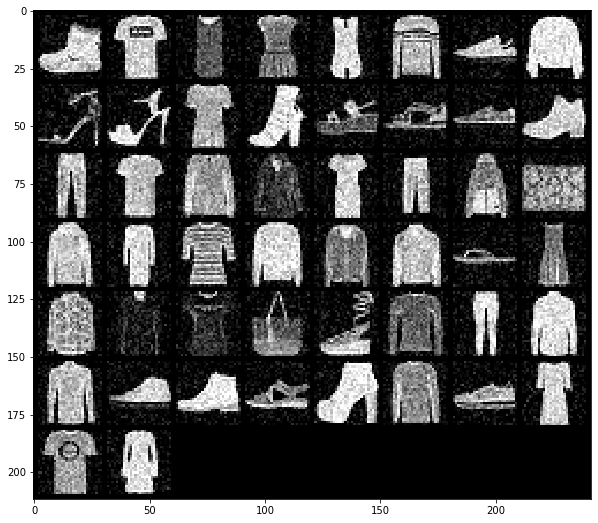

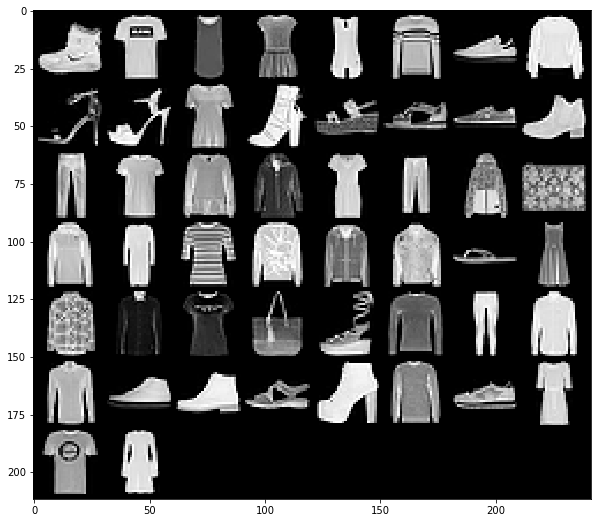

In [8]:
x = [train_dataset[i][0] for i in range(50)]
y = [train_dataset[i][1] for i in range(50)]

plt.figure(figsize=(10,10))
show(torchvision.utils.make_grid(x))
plt.show()

plt.figure(figsize=(10,10))
show(torchvision.utils.make_grid(y))
plt.show()

In [9]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28,28)), #Image format conversion from 2-dimensional to 1-dimensional arrays
#     keras.layers.Dense(128,activation='relu'),
#     keras.layers.Dense(10)
# ])
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# model.fit(x,labels,epochs=10)

# test_loss, test_acc = model.evaluate(x,labels,verbose=2)
# print('\nTest accuracy:',test_acc)

# probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
# predictions = probability_model.predict(test_dataset)

# predictions[0]

# vgg16_true = torchvision.models.vgg16(pretrained = True)